In [ ]:
from zipfile import ZipFile
file_name = 'archive.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

In [1]:
import numpy as np
import cv2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import adam_v2
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
train_dir = 'train'
val_dir = 'test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

In [8]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay = 1e-6)

In [9]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

C:\Users\MSI\AppData\Local\Temp/ipykernel_1596/3964121614.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


Epoch 1/50
448/448 [==============================] - 280s 625ms/step - loss: 1.8043 - accuracy: 0.2553 - val_loss: 1.7227 - val_accuracy: 0.3319
Epoch 2/50
448/448 [==============================] - 197s 439ms/step - loss: 1.6275 - accuracy: 0.3667 - val_loss: 1.5264 - val_accuracy: 0.4233
Epoch 3/50
448/448 [==============================] - 193s 431ms/step - loss: 1.5162 - accuracy: 0.4177 - val_loss: 1.4402 - val_accuracy: 0.4523
Epoch 4/50
448/448 [==============================] - 192s 428ms/step - loss: 1.4426 - accuracy: 0.4484 - val_loss: 1.3809 - val_accuracy: 0.4777
Epoch 5/50
448/448 [==============================] - 193s 431ms/step - loss: 1.3817 - accuracy: 0.4731 - val_loss: 1.3259 - val_accuracy: 0.4987
Epoch 6/50
448/448 [==============================] - 197s 439ms/step - loss: 1.3271 - accuracy: 0.4968 - val_loss: 1.2874 - val_accuracy: 0.5114
Epoch 7/50
448/448 [==============================] - 194s 434ms/step - loss: 1.2880 - accuracy: 0.5110 - val_loss: 1.2617 -

In [10]:
emotion_model.save('model.h5')

In [11]:
def emotion_predict(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align = 'center', alpha = 0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

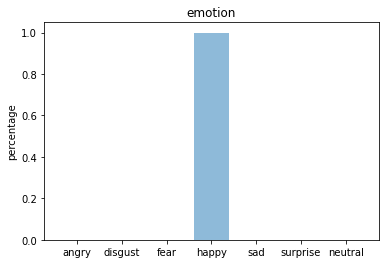

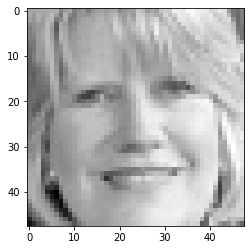

In [35]:
def facecrop(image):  
    facedata = 'test/haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]

            
            cv2.imwrite('capture.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)

   


if __name__ == '__main__':
    facecrop('test/happy/PrivateTest_10516065.jpg')

#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

file = 'test/happy/PrivateTest_13051954.jpg'
true_image = tf.keras.utils.load_img(file)
img = tf.keras.utils.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = emotion_model.predict(x)
emotion_predict(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);


plt.imshow(true_image)
plt.show()